# Gerar dados artificiais

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_gaussian_quantiles, make_classification

# X, y = make_regression(n_samples=2500, n_features=5, noise=5, random_state=42)
# X

# X, y = make_gaussian_quantiles(n_samples=2500, n_features=2, n_classes=3, random_state=32)
# X

# X, y = make_classification(n_samples=2000, n_features=2, n_informative=, n_classes=5, n_redundant=0, class_sep=0.85, random_state=1) #Class sep permite alterar a distância entre classes, facilita a classificação
# Generate with 4 features (for training), 5 classes
X, y = make_classification(n_samples=2500, n_features=4, n_classes=5, n_informative=4,
                          n_redundant=0, class_sep=1, random_state=25)

mask = (y == 0) | (y == 1)
# X[mask, 0] = X[mask, 0] * 0.7 + X[mask, 0].mean() * 0.3
# X[mask, 1] = X[mask, 1] * 0.7 + X[mask, 1].mean() * 0.3
# For plotting, use only the first two features
X_plot = X[:, :2]
# plot_decision_boundary(model, X_plot, y, resolution=300)

X = X_plot


In [41]:
for i in range(len(y)):
    if y[i] > 0:
        y[i] = 1
    elif y[i] <= 0:
        y[i] = 0
        
y = y.astype(np.int64)
y

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

# Normalizar dados

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std
print(f'Tamanho do conjunto de treino: {x_train.shape}')
print(f'Tamanho do conjunto de teste: {x_test.shape}')

Tamanho do conjunto de treino: (2000, 2)
Tamanho do conjunto de teste: (500, 2)


# Chamar classificador (ECOC primal)

Será gerado output codes de tamanho 15 bits para dados com 5 classes diferentes e canônicas.
Gerando modelo para bit #1 do output code...
Gerando modelo para bit #2 do output code...
Gerando modelo para bit #3 do output code...
Gerando modelo para bit #4 do output code...
Gerando modelo para bit #5 do output code...
Gerando modelo para bit #6 do output code...
Gerando modelo para bit #7 do output code...
Gerando modelo para bit #8 do output code...
Gerando modelo para bit #9 do output code...
Gerando modelo para bit #10 do output code...
Gerando modelo para bit #11 do output code...
Gerando modelo para bit #12 do output code...
Gerando modelo para bit #13 do output code...
Gerando modelo para bit #14 do output code...
Gerando modelo para bit #15 do output code...
Acurácia de treino: 0.39
Acurácia de teste: 0.41


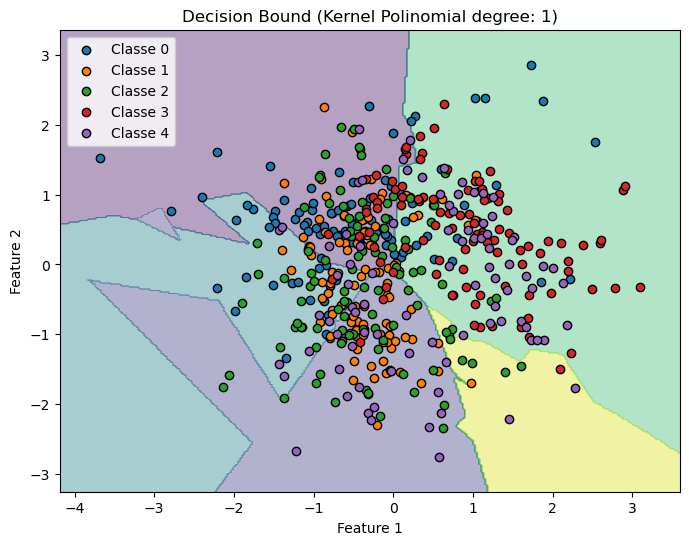

In [49]:
from CLog_MC_Ecoc import CLog_Ecoc
from utils import plot_decision_boundary
from sklearn.metrics import accuracy_score

model = CLog_Ecoc(n_iter=1000, batch_size=None, kernel=1, step=0.01, mode='primal', iterative=False)

model.fit(x_train, y_train)

y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')
plot_decision_boundary(model, x_test, y_test, resolution=300)

# Matriz de confusão

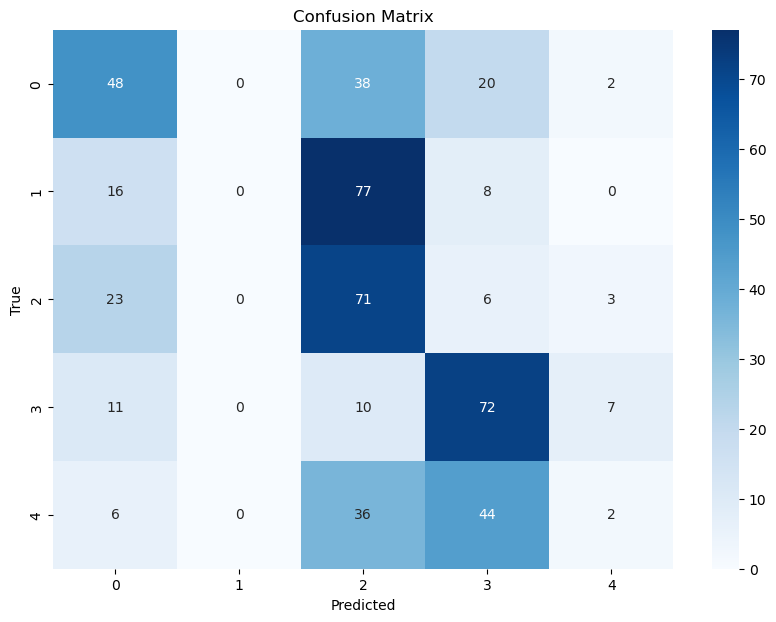

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Chamar classificador (OvO primal) 

Training binary classifiers: 100%|██████████| 10/10 [00:00<00:00, 11.19it/s, Par=3 vs 4]


Acurácia de treino: 0.36
Acurácia de teste: 0.39


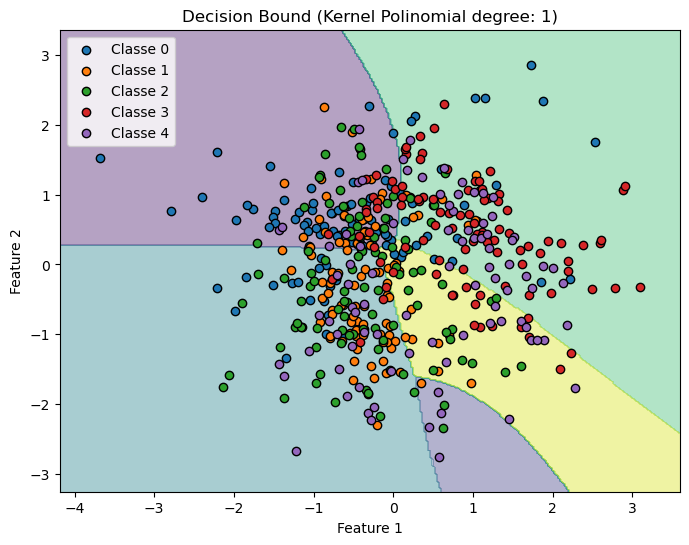

In [54]:
from CLog_MC_OvO import CLog_OVO
from utils import plot_decision_boundary

model = CLog_OVO(kernel=1, step=0.005, n_iter=1000, batch_size=64, iterative=False,mode='primal')
model.fit(x_train, y_train)

y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')
plot_decision_boundary(model, x_test, y_test, resolution=300)

# Chamar classificador (ECOC dual)

In [52]:
from CLog_MC_Ecoc import CLog_Ecoc
from utils import plot_decision_boundary
from sklearn.metrics import accuracy_score

model = CLog_Ecoc(n_iter=1000, batch_size=None, kernel=1, step=0.01, mode='dual', iterative=False)

model.fit(x_train, y_train)

y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')
plot_decision_boundary(model, x_test, y_test, resolution=300)

Será gerado output codes de tamanho 15 bits para dados com 5 classes diferentes e canônicas.
Gerando modelo para bit #1 do output code...


KeyboardInterrupt: 

# Chamar classificador (OvO dual) 

Training binary classifiers: 100%|██████████| 10/10 [00:01<00:00,  5.06it/s, Par=3 vs 4]


Acurácia de treino: 0.36
Acurácia de teste: 0.39


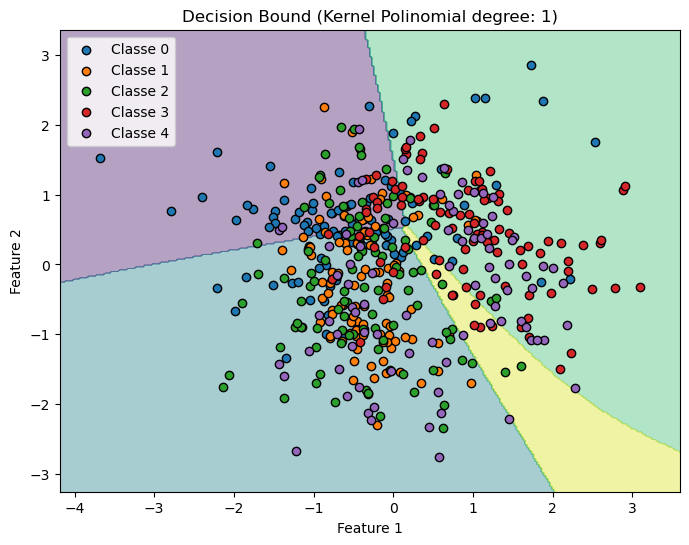

In [57]:
from CLog_MC_OvO import CLog_OVO
from utils import plot_decision_boundary

model = CLog_OVO(kernel=1, step=0.005, n_iter=1000, batch_size=64, iterative=False,mode='dual')
model.fit(x_train, y_train)

y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')
plot_decision_boundary(model, x_test, y_test, resolution=300)